In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression



In [87]:
insurance = pd.read_csv("insurance.csv")
df = insurance.copy()
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [89]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [90]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [91]:
df["smoker"].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [92]:
object_cols = [col for col in df.columns if df[col].dtype == "object"]
label_encoder = LabelEncoder()
df["sex"] = label_encoder.fit_transform(df["sex"])
df["smoker"] = label_encoder.fit_transform(df["smoker"])
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


In [93]:
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

OH_cols = OH_encoder.fit_transform(df[["region"]])
# Create a DataFrame from the encoded columns with region names as column names
OH_cols_df = pd.DataFrame(OH_cols)
OH_cols_df.index = df.index
df = df.drop("region", axis=1)
df = pd.concat([df, OH_cols_df], axis=1)
df.columns = df.columns.astype(str)


df

c:\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,age,sex,bmi,children,smoker,charges,0,1,2,3
0,19,0,27.900,0,1,16884.92400,0.0,0.0,0.0,1.0
1,18,1,33.770,1,0,1725.55230,0.0,0.0,1.0,0.0
2,28,1,33.000,3,0,4449.46200,0.0,0.0,1.0,0.0
3,33,1,22.705,0,0,21984.47061,0.0,1.0,0.0,0.0
4,32,1,28.880,0,0,3866.85520,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0.0,1.0,0.0,0.0
1334,18,0,31.920,0,0,2205.98080,1.0,0.0,0.0,0.0
1335,18,0,36.850,0,0,1629.83350,0.0,0.0,1.0,0.0
1336,21,0,25.800,0,0,2007.94500,0.0,0.0,0.0,1.0


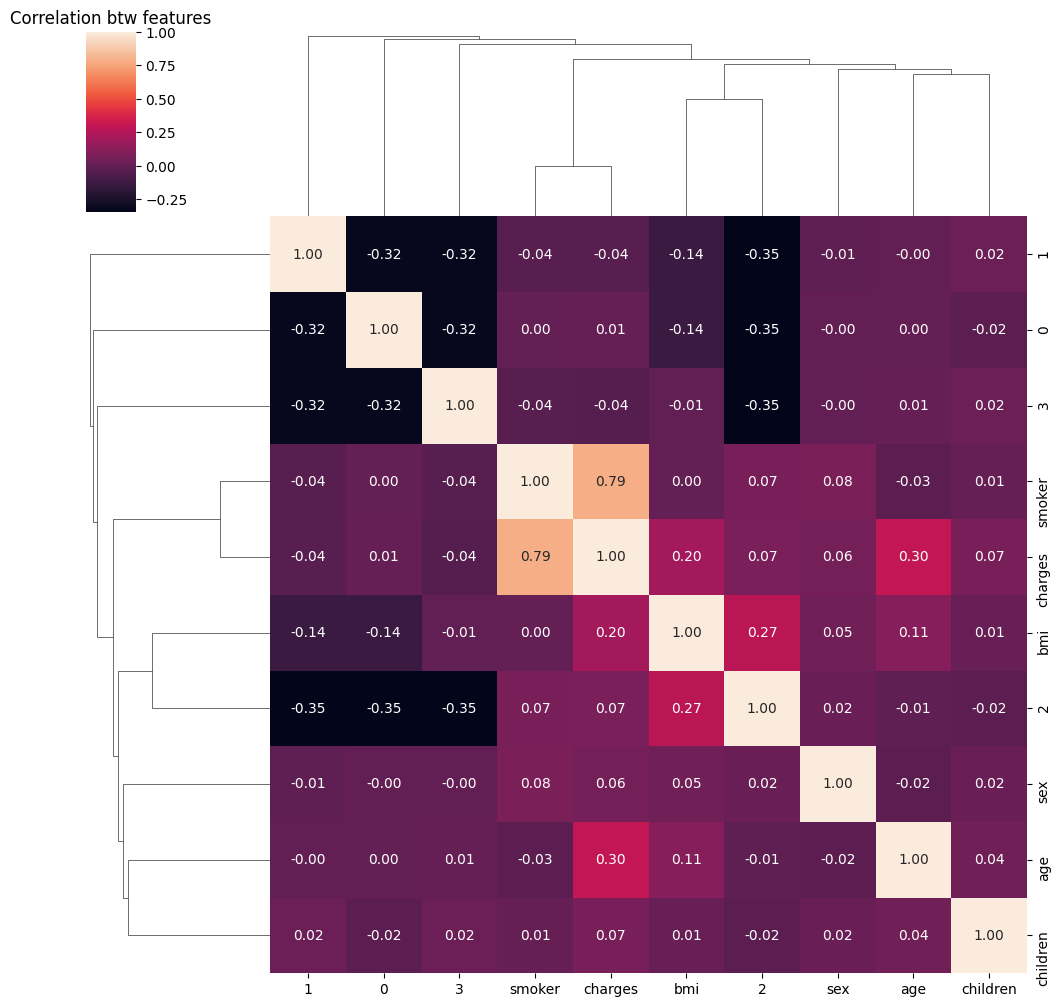

In [94]:
sns.clustermap(df.corr(), annot = True, fmt = ".2f")
plt.title("Correlation btw features")
plt.show()

In [95]:
region_with_most_children = insurance.groupby('region')['children'].sum().idxmax()
print("Region with the most children:", region_with_most_children)

Region with the most children: southeast


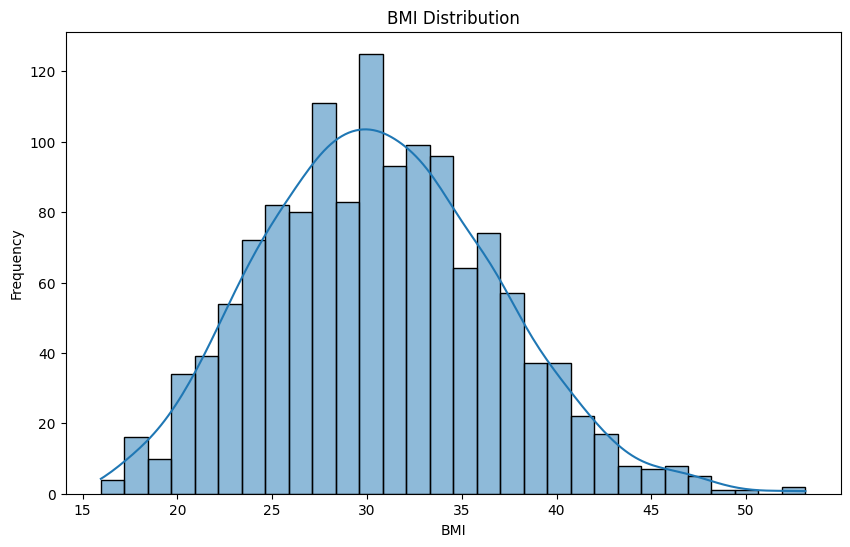

In [96]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='bmi', bins=30, kde=True)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()


In [97]:
# Count the occurrences of each BMI score ordered by bmi
bmi_counts = df['bmi'].value_counts().sort_index()
bmi_counts

bmi
15.960    1
16.815    2
17.195    1
17.290    3
17.385    1
         ..
48.070    1
49.060    1
50.380    1
52.580    1
53.130    1
Name: count, Length: 548, dtype: int64

<Axes: xlabel='bmi'>

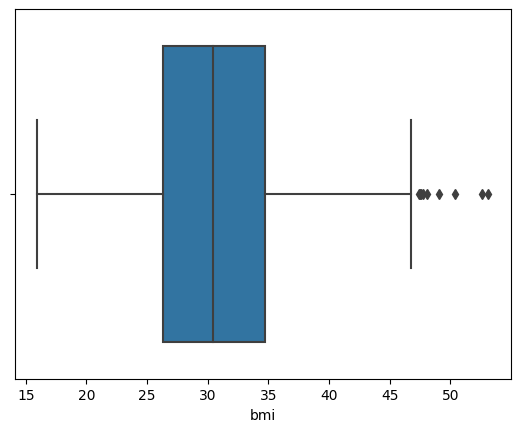

In [98]:
sns.boxplot(x="bmi", data=df)

In [99]:
y = df.charges
X = df.drop("charges", axis=1)

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [101]:
X_train

,age,sex,bmi,children,smoker,0,1,2,3
1144,50,1,32.300,2,0,0.0,0.0,0.0,1.0
1053,47,1,29.800,3,1,0.0,0.0,0.0,1.0
1064,29,0,25.600,4,0,0.0,0.0,0.0,1.0
526,19,0,30.590,2,0,0.0,1.0,0.0,0.0
344,49,0,41.470,4,0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
108,29,1,27.940,0,0,0.0,0.0,1.0,0.0
393,49,1,31.350,1,0,1.0,0.0,0.0,0.0
805,45,0,35.815,0,0,0.0,1.0,0.0,0.0
505,37,1,30.875,3,0,0.0,1.0,0.0,0.0


In [105]:
linearR = LinearRegression()
linearR.fit(X_train, y_train)
_linear_pred = linearR.predict(X_test)

0.7865970561548234


In [106]:
print(r2_score(y_test, linear_pred))
print(mean_squared_error(y_test, linear_pred))

0.7865970561548234
31865380.70935293


In [107]:
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train, y_train)
random_pred = random_forest_model.predict(X_test)

In [108]:
print(r2_score(y_test, random_pred))
print(mean_squared_error(y_test, random_pred))

0.866539276588083
19928388.44974775
